## Seminar 2: Predicting Biodegradability of Chemicals
### Intelligent Systems (IS), 8.1.2023
### Rok Rajher, Jan Kuhta

## Exploration

#### Loading datasets

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
2,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
4,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,2
13,4.214,2.6272,0,0,0,0,0,30.0,3,0,...,0,0,0,2.998,1.722,0,6.770,0,0,2
16,3.942,2.7719,1,0,0,0,0,31.6,2,0,...,0,0,0,3.542,1.739,0,8.127,0,1,2


#### Balance of target class

In [216]:
cnt = train['Class'].value_counts()

print(cnt)
print(cnt / len(train))

1    564
2    282
Name: Class, dtype: int64
1    0.666667
2    0.333333
Name: Class, dtype: float64


#### Finding columns with NaN values

In [217]:
cols_with_nan = train.columns[train.isnull().any()]
display(cols_with_nan)

Index(['V4', 'V22', 'V27', 'V29', 'V37'], dtype='object')

#### Replacing NaN values in column "V4"

In [218]:
v4 = train['V4'].values
unique_values, counts = np.unique(v4, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0.0: 800
1.0: 17
2.0: 4
nan: 25


Because most of the values in column "V4" are 0, replacing NaN values with 0 seems most suitable.


In [219]:
test['V4'] = test['V4'].fillna(0)
train['V4'] = train['V4'].fillna(0)

#### Replacing NaN values in column "V22"

In [220]:
v4 = train['V22'].values
unique_values, counts = np.unique(v4, return_counts=True)

for value, count in zip(unique_values[:5], counts[:5]):
    print(f"{value}: {count}")

0.898: 1
0.906: 3
0.911: 1
0.995: 1
0.999: 1


Sinse most of the values in column "V22" are unique real numbers, replacing NaN values with mean of the column seems most suitable.

In [221]:
mean_value_test = test['V22'].mean()
mean_value_train = train['V22'].mean()


test['V22'] = test['V22'].fillna(mean_value_test)
train['V22'] = train['V22'].fillna(mean_value_train)

#### Replacing NaN values in column "V27"

In [222]:
v4 = train['V27'].values
unique_values, counts = np.unique(v4, return_counts=True)
for value, count in zip(unique_values[:5], counts[:5]):
    print(f"{value}: {count}")

1.0: 1
1.414: 7
1.618: 10
1.732: 16
1.802: 8


Similarly to column "V22", this column is represented by many unique real values, therefore the mean values seems the most suitable again.

In [223]:
mean_value_test = test['V27'].mean()
mean_value_train = train['V27'].mean()


test['V27'] = test['V27'].fillna(mean_value_test)
train['V27'] = train['V27'].fillna(mean_value_train)

#### Replacing NaN values in column "V29"

In [224]:
v29 = train['V29'].values
unique_values, counts = np.unique(v29, return_counts=True)
for value, count in zip(unique_values[:5], counts[:5]):
    print(f"{value}: {count}")

0.0: 817
1.0: 21
nan: 8


This column only containts whole numbers 0 and 1, with 0 being by far the most represented value in the column, therefore replacing NaN with 0 seems most optimal here.

In [225]:
test['V29'] = test['V29'].fillna(0)
train['V29'] = train['V29'].fillna(0)

#### Replacing NaN values in column "V37"

In [226]:
v37 = train['V37'].values
unique_values, counts = np.unique(v37, return_counts=True)
for value, count in zip(unique_values[:5], counts[:5]):
    print(f"{value}: {count}")

1.467: 1
1.5: 2
1.528: 1
1.55: 1
1.551: 1


Similarly to columns "V22" and "V27", this column is represented by many unique real values, therefore the mean values seems the most suitable again.

In [227]:
mean_value_test = test['V37'].mean()
mean_value_train = train['V37'].mean()


test['V37'] = test['V37'].fillna(mean_value_test)
train['V37'] = train['V37'].fillna(mean_value_train)

#### Visualization

Visualization of importance that each feature provides

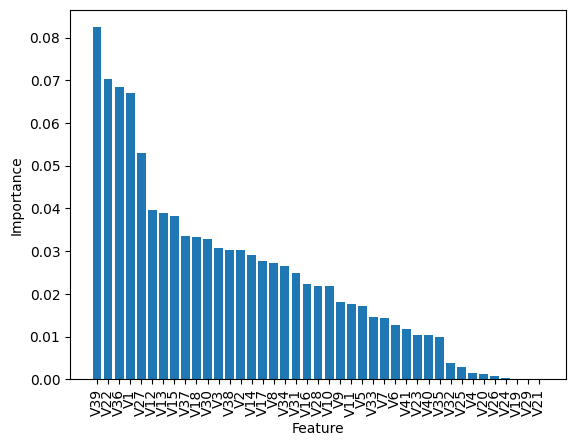

In [228]:
from sklearn.ensemble import RandomForestClassifier
# Select the features and target variable
X = train.drop('Class', axis=1)
y = train['Class']

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Get the feature importance scores
importances = model.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Create a list of the feature names
feature_names = list(X.columns[indices])

# Create a bar plot of the feature importance scores
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

Visualziation of correlation between pairs of attributes using heatmap

V15  V27    0.919547
V27  V15    0.919547
V1   V27    0.916709
V27  V1     0.916709
V36  V39    0.916597
dtype: float64
V18  V22   -0.794449
V22  V18   -0.794449
V8   V18   -0.700296
V18  V8    -0.700296
V10  V12   -0.517011
dtype: float64


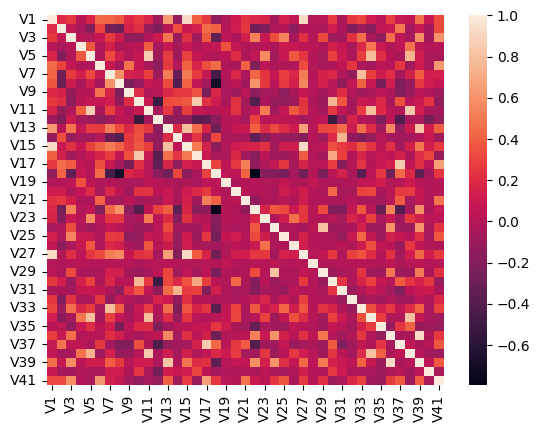

In [229]:
import seaborn as sns

X = train.drop("Class",axis=1)
corr = X.corr()

corr1 = corr.where(corr != 1)
top5 = corr1.stack().nlargest(5)
print(top5)

bott5 = corr1.stack().nsmallest(5)
print(bott5)

sns.heatmap(corr)
plt.show()

Visualization of correlation between each feature(or number of combined features) and target variable

0.2797771287165461 ('V14', 'V15')
-0.3904146777174203 ('V1', 'V2')


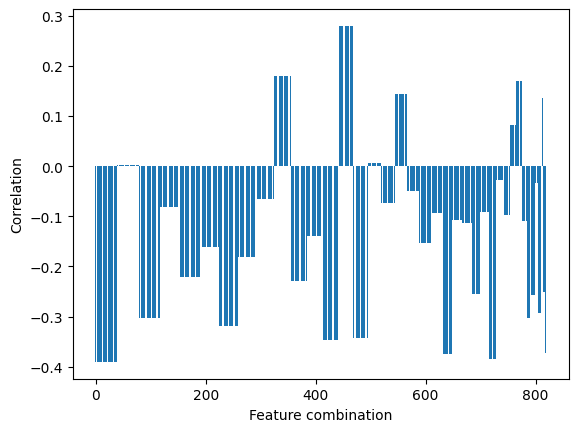

In [230]:
import itertools

number_of_combined_features = 2


X = train.drop('Class', axis=1)
y = train['Class']


combinations = list(itertools.combinations(X.columns, number_of_combined_features))


for c in combinations:
    corr = X[list(c)].corrwith(y, method='pearson')


correlations = []


maxc = -np.inf
minc = np.inf
for c in combinations:
    corr = X[list(c)].corrwith(y, method='pearson')
    correlations.append(corr[0])
    if maxc < corr[0]:
        maxc = corr[0]
        maxval = c

    if minc > corr[0]:
        minc = corr[0]
        minval = c

print(maxc,maxval)
print(minc,minval)


plt.bar(range(len(combinations)), correlations)

plt.xlabel('Feature combination')
plt.ylabel('Correlation')
plt.show()



## Modeling

In [274]:
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, accuracy_score

X_train = train.iloc[:,:-1].values
y_train = train['Class']

X_test = test.iloc[:,:-1].values
y_test = test['Class']

def display_scores(y_pred, y_true):
    f1 = f1_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    AUC = roc_auc_score(y_true,y_pred)

    data = np.array([[f1,precision,recall,AUC]])
    scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

    display(scores)
    
    return data

#### Majority classifier and random classifier

In [275]:
predictions = np.full(209, 1)
dataMC = display_scores(predictions, y_test)


,F1,precision,recall,AUC
0,0.784884,0.645933,1.0,0.5


In [233]:
import random
predictions = [random.choice([1, 2]) for _ in range(len(y_test))]
predictions = np.full(209, 1)
dataRan = display_scores(predictions, y_test)

,F1,precision,recall,AUC
0,0.507177,0.663265,0.481481,0.517768


#### Logistic regression

In [234]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs',max_iter=10000)

model.fit(X_train, y_train)

LR_prediction = model.predict(X_test)

f1 = f1_score(LR_prediction,y_test)
precision = precision_score(LR_prediction,y_test)
recall = recall_score(LR_prediction,y_test)
AUC = roc_auc_score(LR_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)


,F1,precision,recall,AUC
0,0.875,0.881481,0.868613,0.823195


#### SVM

In [235]:
from sklearn.svm import SVC

SVC_model = SVC()

SVC_model.fit(X_train, y_train)

SVC_prediction = SVC_model.predict(X_test)

f1 = f1_score(SVC_prediction,y_test)
precision = precision_score(SVC_prediction,y_test)
recall = recall_score(SVC_prediction,y_test)
AUC = roc_auc_score(SVC_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.855124,0.896296,0.817568,0.79403


#### KNN

In [236]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(X_train, y_train)

KNN_prediction = KNN_model.predict(X_test)

f1 = f1_score(KNN_prediction,y_test)
precision = precision_score(KNN_prediction,y_test)
recall = recall_score(KNN_prediction,y_test)
AUC = roc_auc_score(KNN_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.801527,0.777778,0.826772,0.730459


### Feature selection

#### Correlation based feature selection

In [237]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_train = train.drop('Class', axis=1)
y_train = train['Class']

X_test = train.drop('Class', axis=1)
y_test = train['Class']

# Create a SelectKBest object
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector to the data and get the selected features
X_corr_train = selector.fit_transform(X_train, y_train)
X_corr_test = selector.transform(X_test)

Logical regression

In [238]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)

model.fit(X_corr_train, y_train)

LR_prediction = model.predict(X_corr_test)

f1 = f1_score(LR_prediction,y_test)
precision = precision_score(LR_prediction,y_test)
recall = recall_score(LR_prediction,y_test)
AUC = roc_auc_score(LR_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.843803,0.881206,0.809446,0.760327


SVM

In [239]:
SVC_model = SVC()

SVC_model.fit(X_corr_train, y_train)

SVC_prediction = SVC_model.predict(X_corr_test)

f1 = f1_score(SVC_prediction,y_test)
precision = precision_score(SVC_prediction,y_test)
recall = recall_score(SVC_prediction,y_test)
AUC = roc_auc_score(SVC_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.831752,0.85461,0.810084,0.741695


KNN

In [240]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(X_corr_train, y_train)

KNN_prediction = KNN_model.predict(X_corr_test)

f1 = f1_score(KNN_prediction,y_test)
precision = precision_score(KNN_prediction,y_test)
recall = recall_score(KNN_prediction,y_test)
AUC = roc_auc_score(KNN_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.888688,0.870567,0.907579,0.834117


#### Information gain feature selection

In [241]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the information gain of each feature
X_train = np.array(X_train)
X_test = np.array(X_test)
scores = mutual_info_classif(X_train, y)

# Sort the features by their information gain and select the top 10
sorted_indexes = np.argsort(scores)[::-1][:10]
X_gain_train = X_train[:, sorted_indexes]
X_gain_test = X_test[:, sorted_indexes]


Logical regression

In [242]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)

model.fit(X_gain_train, y_train)

LR_prediction = model.predict(X_gain_test)

f1 = f1_score(LR_prediction,y_test)
precision = precision_score(LR_prediction,y_test)
recall = recall_score(LR_prediction,y_test)
AUC = roc_auc_score(LR_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.85567,0.882979,0.83,0.780854


SVM

In [243]:
SVC_model = SVC()

SVC_model.fit(X_gain_train, y_train)

SVC_prediction = SVC_model.predict(X_gain_test)

f1 = f1_score(SVC_prediction,y_test)
precision = precision_score(SVC_prediction,y_test)
recall = recall_score(SVC_prediction,y_test)
AUC = roc_auc_score(SVC_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.864177,0.902482,0.82899,0.795961


KNN

In [244]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(X_gain_train, y_train)

KNN_prediction = KNN_model.predict(X_gain_test)

f1 = f1_score(KNN_prediction,y_test)
precision = precision_score(KNN_prediction,y_test)
recall = recall_score(KNN_prediction,y_test)
AUC = roc_auc_score(KNN_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.900981,0.89539,0.906643,0.851245


#### Lasso feature selection

In [245]:
from sklearn.linear_model import LassoCV

# Fit the model to the data
selector = LassoCV()
selector.fit(X, y)

# Get the indices of the most important features
important_feature_indices = selector.coef_ != 0

# Select the most important features
X_lasso_train = X_train[:, important_feature_indices]
X_lasso_test = X_test[:, important_feature_indices]

Logistic regression

In [246]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)

model.fit(X_lasso_train, y_train)

LR_prediction = model.predict(X_lasso_test)

f1 = f1_score(LR_prediction,y_test)
precision = precision_score(LR_prediction,y_test)
recall = recall_score(LR_prediction,y_test)
AUC = roc_auc_score(LR_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.917399,0.925532,0.909408,0.877498


SVM

In [247]:
SVC_model = SVC()

SVC_model.fit(X_lasso_train, y_train)

SVC_prediction = SVC_model.predict(X_lasso_test)

f1 = f1_score(SVC_prediction,y_test)
precision = precision_score(SVC_prediction,y_test)
recall = recall_score(SVC_prediction,y_test)
AUC = roc_auc_score(SVC_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.877398,0.932624,0.828346,0.824126


KNN

In [248]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(X_lasso_train, y_train)

KNN_prediction = KNN_model.predict(X_lasso_test)

f1 = f1_score(KNN_prediction,y_test)
precision = precision_score(KNN_prediction,y_test)
recall = recall_score(KNN_prediction,y_test)
AUC = roc_auc_score(KNN_prediction,y_test)

data = np.array([[f1,precision,recall,AUC]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])

display(scores)

,F1,precision,recall,AUC
0,0.910714,0.904255,0.917266,0.86553


## Evaluation

### K-fold Cross validation

In [249]:
from numpy import mean
from numpy import std

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

def k_fold_corss_validation(model):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    # create model
    modelSVM = SVC()
    X = X_lasso_train
    y = y_train

    #scoring
    scoring = ('f1', 'precision', 'recall', 'roc_auc')
    # evaluate model
    results = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
 
    f1_mean = mean(results['test_f1'])
    precision_mean = mean(results['test_precision'])
    recall_mean = mean(results['test_recall'])
    auc_mean = mean(results['test_roc_auc'])
    
    f1_std = std(results['test_f1'])
    precision_std = std(results['test_precision'])
    recall_std = std(results['test_recall'])
    auc_std = std(results['test_roc_auc'])

    data = np.array([[f1_mean,precision_mean,recall_mean,auc_mean],
                     [f1_std,precision_std,recall_std,auc_std]])
    scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])
    scores.index = ['mean', 'std']
    display(scores)
    return data

#### Logistic regression - K-fold Cross validation on train set

In [259]:
modelLR = LogisticRegression(solver='lbfgs',max_iter=10000)
dataLR = k_fold_corss_validation(modelLR)
LR_f1 = dataLR[:,0]
LR_precision = dataLR[:,1]
LR_recall = dataLR[:,2]
LR_auc = dataLR[:,3]
LR_means = dataLR[0]

,F1,precision,recall,AUC
mean,0.905198,0.899681,0.912049,0.925658
std,0.027602,0.037972,0.034550,0.031780


#### SVM - K-fold Cross validation on train set

In [260]:
modelSVM = SVC()
dataSVM = k_fold_corss_validation(modelSVM)
SVM_f1 = dataSVM[:,0]
SVM_precision = dataSVM[:,1]
SVM_recall = dataSVM[:,2]
SVM_auc = dataSVM[:,3]
SVM_means = dataSVM[0]

,F1,precision,recall,AUC
mean,0.863793,0.810477,0.927364,0.883485
std,0.035391,0.055156,0.030769,0.034679


#### KNN - K-fold Cross validation on train set

In [261]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
dataKNN = k_fold_corss_validation(modelKNN)
KNN_f1 = dataKNN[:,0]
KNN_precision = dataKNN[:,1]
KNN_recall = dataKNN[:,2]
KNN_auc = dataKNN[:,3]
KNN_means = dataKNN[0]


,F1,precision,recall,AUC
mean,0.859303,0.876528,0.844515,0.881529
std,0.035593,0.048417,0.042465,0.036064


### Evaluation on train set

In [262]:
def evaluate(data):
    evaluation = pd.DataFrame(data, columns=['Mean', 'Std deviation'])
    evaluation.index = ['LR', 'SVM', 'KNN']
    evaluation.sort_values(by=['Mean'],inplace=True,ascending=False)
    display(evaluation)

### F1

In [263]:
f1_data = np.array([LR_f1, SVM_f1, KNN_f1])
evaluate(f1_data)

,Mean,Std deviation
LR,0.905198,0.027602
SVM,0.863793,0.035391
KNN,0.859303,0.035593


According to metric F1, the best results were returned when using Logistic Regression.

#### Precision

In [264]:
precision_data = np.array([LR_precision, SVM_precision, KNN_precision])
evaluate(precision_data)

,Mean,Std deviation
LR,0.899681,0.037972
KNN,0.876528,0.048417
SVM,0.810477,0.055156


According to metric Precision, the best results were returned when using Logistic Regression.

#### Recall

In [265]:
recall_data = np.array([LR_recall, SVM_recall, KNN_recall])
evaluate(recall_data)

,Mean,Std deviation
SVM,0.927364,0.030769
LR,0.912049,0.034550
KNN,0.844515,0.042465


According to metric Recall, the best results were returned when using SVM.

#### AUC

In [266]:
auc_data = np.array([LR_auc, SVM_auc, KNN_auc])
evaluate(auc_data)

,Mean,Std deviation
LR,0.925658,0.031780
SVM,0.883485,0.034679
KNN,0.881529,0.036064


According to metric AUC, the best results were returned when using Logistic Regression.

In [272]:
data = np.array([LR_means, SVM_means, KNN_means])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])
scores.index = ['LR', 'SVM', 'KNN']
display(scores)

,F1,precision,recall,AUC
LR,0.905198,0.899681,0.912049,0.925658
SVM,0.863793,0.810477,0.927364,0.883485
KNN,0.859303,0.876528,0.844515,0.881529


Logistic Regression performed the best according to F1, Precision and AUC, and second best in Recall. The differences between the models were however not significant.

For a prediction on the Test set we will therefore use Logistic Regression.

#### Prediction on Test set with Logistic Regression


In [273]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_lasso_train, y_train)
LR_prediction = model.predict(X_lasso_test)

f1 = f1_score(LR_prediction,y_test)
precision = precision_score(LR_prediction,y_test)
recall = recall_score(LR_prediction,y_test)
AUC = roc_auc_score(LR_prediction,y_test)

dataLR = np.array([[f1,precision,recall,AUC]])

data = np.array([dataLR[0], dataMC[0], dataRan[0]])
scores = pd.DataFrame(data, columns=['F1','precision','recall','AUC'])
scores.index = ['Logistic Regression', 'Majority Classifier', 'Random Classifier']
display(scores)


,F1,precision,recall,AUC
Logistic Regression,0.917399,0.925532,0.909408,0.877498
Majority Classifier,0.645933,0.645933,1.000000,0.500000
Random Classifier,0.507177,0.663265,0.481481,0.517768


In comparison with Majority and Random classifiers, Logistic Regression performed significantly better.